In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
from plotly.subplots import make_subplots
import talib

In [3]:
df = pd.read_csv("XAUUSDH1.csv")

In [4]:
# df = df[-500:].reset_index(drop=True)
df.head()

Date_Time     Open     High      Low    Close  Volume
0  2016.02.22 21:00  1208.88  1209.56  1207.76  1207.79    2084
1  2016.02.22 22:00  1207.78  1209.49  1207.28  1207.43    2290
2  2016.02.22 23:00  1207.38  1208.95  1207.36  1208.47    1089
3  2016.02.23 01:00  1208.32  1209.57  1207.25  1208.86    1031
4  2016.02.23 02:00  1209.05  1211.47  1207.23  1210.80    4914

In [5]:
from talib import EMA
df['EMA200'] = talib.EMA(df.Close, timeperiod=200)
df['DX'] = talib.DX(df.High, df.Low, df.Close, timeperiod=14)

In [6]:
#SuperTrend
def ST(df,f,n): #df is the dataframe, n is the period, f is the factor; f=3, n=7 are commonly used.
    #Calculation of ATR
    col_name = f"SuperTrend{f}{n}"
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1)
    df['ATR']=np.nan
    df.loc[n-1,'ATR']=df['TR'][:n-1].mean() #.ix is deprecated from pandas verion- 0.19
    for i in range(n,len(df)):
        df['ATR'][i]=(df['ATR'][i-1]*(n-1)+ df['TR'][i])/n
    
    #Calculation of SuperTrend
    df['Upper Basic']=(df['High']+df['Low'])/2+(f*df['ATR'])
    df['Lower Basic']=(df['High']+df['Low'])/2-(f*df['ATR'])
    df['Upper Band']=df['Upper Basic']
    df['Lower Band']=df['Lower Basic']
    for i in range(n,len(df)):
        if df['Close'][i-1]<=df['Upper Band'][i-1]:
            df['Upper Band'][i]=min(df['Upper Basic'][i],df['Upper Band'][i-1])
        else:
            df['Upper Band'][i]=df['Upper Basic'][i]    
    for i in range(n,len(df)):
        if df['Close'][i-1]>=df['Lower Band'][i-1]:
            df['Lower Band'][i]=max(df['Lower Basic'][i],df['Lower Band'][i-1])
        else:
            df['Lower Band'][i]=df['Lower Basic'][i]   
    df[col_name]=np.nan
    for i in df[col_name]:
        if df['Close'][n-1]<=df['Upper Band'][n-1]:
            df[col_name][n-1]=df['Upper Band'][n-1]
        elif df['Close'][n-1]>df['Upper Band'][i]:
            df[col_name][n-1]=df['Lower Band'][n-1]
    for i in range(n,len(df)):
        if df[col_name][i-1]==df['Upper Band'][i-1] and df['Close'][i]<=df['Upper Band'][i]:
            df[col_name][i]=df['Upper Band'][i]
        elif  df[col_name][i-1]==df['Upper Band'][i-1] and df['Close'][i]>=df['Upper Band'][i]:
            df[col_name][i]=df['Lower Band'][i]
        elif df[col_name][i-1]==df['Lower Band'][i-1] and df['Close'][i]>=df['Lower Band'][i]:
            df[col_name][i]=df['Lower Band'][i]
        elif df[col_name][i-1]==df['Lower Band'][i-1] and df['Close'][i]<=df['Lower Band'][i]:
            df[col_name][i]=df['Upper Band'][i]
    return df

In [7]:
# n is the period, f is the factor; f=3, n=7 are commonly used.
df = ST(df, f=3,n=12)
df = ST(df, f=1,n=10)
df = ST(df, f=2,n=11)

c:\users\thinhpc\anaconda3\envs\p37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
c:\users\thinhpc\anaconda3\envs\p37\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\thinhpc\anaconda3\envs\p37\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\thinhpc\anaconda3\envs\p37\lib\sit

In [8]:
df.head()

Date_Time     Open     High      Low    Close  Volume  EMA200  DX  \
0  2016.02.22 21:00  1208.88  1209.56  1207.76  1207.79    2084     NaN NaN   
1  2016.02.22 22:00  1207.78  1209.49  1207.28  1207.43    2290     NaN NaN   
2  2016.02.22 23:00  1207.38  1208.95  1207.36  1208.47    1089     NaN NaN   
3  2016.02.23 01:00  1208.32  1209.57  1207.25  1208.86    1031     NaN NaN   
4  2016.02.23 02:00  1209.05  1211.47  1207.23  1210.80    4914     NaN NaN   

    H-L  H-PC  L-PC    TR  ATR  Upper Basic  Lower Basic  Upper Band  \
0  1.80   NaN   NaN  1.80  NaN          NaN          NaN         NaN   
1  2.21  1.70  0.51  2.21  NaN          NaN          NaN         NaN   
2  1.59  1.52  0.07  1.59  NaN          NaN          NaN         NaN   
3  2.32  1.10  1.22  2.32  NaN          NaN          NaN         NaN   
4  4.24  2.61  1.63  4.24  NaN          NaN          NaN         NaN   

   Lower Band  SuperTrend312  SuperTrend110  SuperTrend211  
0         NaN            NaN            NaN            NaN  
1         NaN            NaN            NaN            NaN  
2         NaN            NaN            NaN            NaN  
3         NaN            NaN            NaN            NaN  
4         NaN            NaN            NaN            NaN

In [9]:
# fig = go.Figure(data=[
#     go.Candlestick(x=df['Date_Time'], open=df['Open'], high=df['High'], low=df['Low'], close=df['Close']),
#     go.Scatter(x=df['Date_Time'], y=df['SuperTrend312'], mode='lines'),
#     go.Scatter(x=df['Date_Time'], y=df['SuperTrend110'], mode='lines'),
#     go.Scatter(x=df['Date_Time'], y=df['SuperTrend211'], mode='lines')
# ])

# # fig.update_layout(xaxis_rangeslider_visible=False)
# fig.show()

In [10]:
fig = go.Figure(data=[go.Scatter(y=df['ATR'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [11]:
fig = go.Figure(data=[go.Scatter(y=df['DX'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [12]:
# df = df.dropna()

In [13]:
def get_trend(close_p: float, sp_trend_1: float, sp_trend_2: float, sp_trend_3: float) -> str:
    if close_p > sp_trend_1 and close_p > sp_trend_2 and close_p > sp_trend_3:
        return "Buy"
    if close_p < sp_trend_1 and close_p < sp_trend_2 and close_p < sp_trend_3:
        return "Sell"
    return "No Trend"

In [42]:
X = []
y = []
order_p = None
order_size = None
order_index = None
profit = 0
max_profit = 0
max_loss = 0
num_loss = 0
num_profit = 0
stop_loss = None
all_profit = []
with_ema = True
with_stoploss = True
with_dx = True
dx_threshold = 20
for dfindex, date_time, close_p, high_p, low_p, atr, sp_trend_1, sp_trend_2, sp_trend_3, ema_200, dx in zip(df.index, df.Date_Time, df.Close, df.High, df.Low, df.ATR, df.SuperTrend312, df.SuperTrend110, df.SuperTrend211, df.EMA200, df.DX):
    current_trend = get_trend(close_p, sp_trend_1, sp_trend_2, sp_trend_3)
    if current_trend == "Buy":
        if order_p is not None and order_size == 'Sell':
            # close sell order if exist
            real_price = stop_loss if close_p > stop_loss else close_p
            diff = order_p - real_price
            profit += diff
            print(f"{date_time} {dfindex} close {order_size} order at price {real_price}, max profit {round(profit, 2)} diff {round(diff, 2)}")
            all_profit.append(profit)
            if diff < 0:
                max_loss -= abs(diff)
                num_loss += 1
            else:
                max_profit += diff
                num_profit += 1
            
            # create data frame for predict outcome
            label = 0 if diff < 0 else 1
            x_train = df.iloc[order_index-10:order_index, 5].values.flatten().tolist()
            if len(x_train) == 10:
                X.append(x_train)
                y.append(label)
            # save to debug
#             save_result(order_index, dfindex)
            
            # reset flags
            order_p = None
            order_size = None
            stop_loss = None
            order_index = None
        if order_p is None:
#             if close_p > ema_200:
            # place a new order
            order_p = close_p
            order_size = current_trend
            stop_loss = close_p - atr
            order_index = dfindex
            print(f"{date_time} {dfindex} new {order_size} order at price {close_p} stop loss {round(stop_loss, 2)}")
    elif current_trend == 'Sell':
        if order_p is not None and order_size == 'Buy':
            # close buy order if exist
            real_price = stop_loss if close_p < stop_loss else close_p
            diff = real_price - order_p
            profit += diff
            all_profit.append(profit)
            print(f"{date_time} {dfindex} close {order_size} order at price {real_price}, max profit {round(profit, 2)} diff {round(diff, 2)}")
            if diff < 0:
                max_loss -= abs(diff)
                num_loss += 1
            else:
                max_profit += diff
                num_profit += 1
                
            # create data frame for predict outcome
            label = 0 if diff < 0 else 1
            x_train = df.iloc[order_index-10:order_index, 5].values.flatten().tolist()
            if len(x_train) == 100:
                X.append(x_train)
                y.append(label)
            # save to debug
#             save_result(order_index, dfindex)
            
            # reset flags
            order_p = None
            order_size = None
            stop_loss = None
            order_index = None
        if order_p is None:
#             if close_p < ema_200:
            # place a new order
            order_p = close_p
            order_size = current_trend
            stop_loss = close_p + atr
            order_index = dfindex
            print(f"{date_time} {dfindex} new {order_size} order at price {close_p} stop loss {round(stop_loss, 2)}")

    elif order_p is not None and with_stoploss:
        # check stop loss
        if order_size == "Buy":
            if stop_loss > close_p:
                diff = stop_loss - order_p
                profit += diff
                all_profit.append(profit)
                print(f"{date_time} {dfindex} close {order_size} order at stoploss {round(stop_loss, 2)}, max profit {round(profit, 2)} diff {round(diff, 2)}")
                if diff < 0:
                    max_loss -= abs(diff)
                    num_loss += 1
                else:
                    max_profit += diff
                    num_profit += 1
                
                # create data frame for predict outcome
                label = 0 if diff < 0 else 1
                x_train = df.Close.iloc[order_index-10:order_index].values.flatten().tolist()
                if len(x_train) == 10:
                    X.append(x_train)
                    y.append(label)

                # save to debug
                save_result(order_index, dfindex)
            
                # reset flags
                order_p = None
                order_size = None
                stop_loss = None
                order_index = None
            else:
                # modify stop loss of the buy order
                new_stoploss = close_p - atr
                if new_stoploss > stop_loss:
                    stop_loss = new_stoploss
                    print(f"{date_time} {dfindex} stop loss modified at {round(stop_loss, 2)} close price {close_p}")
        elif order_size == "Sell":
            if stop_loss < close_p:
                diff = order_p - stop_loss
                profit += diff
                all_profit.append(profit)
                print(f"{date_time} {dfindex} close {order_size} order at stoploss {round(stop_loss, 2)}, max profit {round(profit, 2)} diff {round(diff, 2)}")
                if order_p - stop_loss < 0:
                    max_loss -= abs(diff)
                    num_loss += 1
                else:
                    max_profit += diff
                    num_profit += 1

                # create data frame for predict outcome
                label = 0 if diff < 0 else 1
                x_train = df.iloc[order_index-10:order_index, 1:5].values.flatten().tolist()
                if len(x_train) == 40:
                    X.append(x_train)
                    y.append(label)
                    
                # save to debug
                save_result(order_index, dfindex)
                
                # reset flags
                order_p = None
                order_size = None
                stop_loss = None
                order_index = None
            else:
                # modify stop loss of the sell order
                new_stoploss = close_p + atr
                if new_stoploss < stop_loss:
                    stop_loss = new_stoploss
                    print(f"{date_time} {dfindex} stop loss modified at {round(stop_loss, 2)} close price {close_p}")
print(f"total trade: {len(all_profit)} avg loss: {max_loss/num_loss} / {num_loss} avg profit {max_profit/num_profit} / {num_profit}")
print(f"total loss: {max_loss} total profit {max_profit} real profit {profit}")

2016.03.04 13:00 199 new Buy order at price 1269.45 stop loss 1265.22
2016.03.04 20:00 206 close Buy order at stoploss 1265.22, max profit -4.23 diff -4.23
2016.03.09 16:00 271 new Sell order at price 1246.3 stop loss 1251.15
2016.03.09 17:00 272 close Sell order at stoploss 1251.15, max profit -9.08 diff -4.85
2016.03.10 03:00 281 new Sell order at price 1250.12 stop loss 1254.67
2016.03.10 11:00 289 stop loss modified at 1253.45 close price 1249.71
2016.03.10 12:00 290 stop loss modified at 1251.73 close price 1248.01
2016.03.10 15:00 293 close Sell order at stoploss 1251.73, max profit -10.69 diff -1.61
2016.03.10 16:00 294 new Buy order at price 1263.71 stop loss 1257.21
2016.03.11 05:00 306 stop loss modified at 1265.11 close price 1270.72
2016.03.11 06:00 307 stop loss modified at 1265.7 close price 1271.02
2016.03.11 07:00 308 stop loss modified at 1269.58 close price 1274.87
2016.03.11 08:00 309 close Buy order at stoploss 1269.58, max profit -4.82 diff 5.87
2016.03.11 22:00 32

2016.05.03 09:00 1137 new Buy order at price 1299.27 stop loss 1295.24
2016.05.03 12:00 1140 close Buy order at stoploss 1295.24, max profit 49.22 diff -4.03
2016.05.06 15:00 1212 new Buy order at price 1292.05 stop loss 1287.65
2016.05.09 01:00 1221 close Buy order at stoploss 1287.65, max profit 44.82 diff -4.4
2016.05.09 14:00 1234 new Sell order at price 1272.8 stop loss 1276.52
2016.05.10 05:00 1248 stop loss modified at 1269.61 close price 1266.15
2016.05.10 06:00 1249 stop loss modified at 1268.13 close price 1264.79
2016.05.10 07:00 1250 stop loss modified at 1267.1 close price 1263.91
2016.05.10 13:00 1256 stop loss modified at 1267.04 close price 1264.07
2016.05.10 21:00 1264 close Sell order at stoploss 1267.04, max profit 50.58 diff 5.76
2016.05.11 08:00 1274 new Buy order at price 1272.63 stop loss 1269.69
2016.05.11 20:00 1286 stop loss modified at 1271.93 close price 1275.33
2016.05.11 21:00 1287 stop loss modified at 1272.74 close price 1276.04
2016.05.12 05:00 1294 clo

2016.06.29 17:00 2085 new Buy order at price 1324.46 stop loss 1320.44
2016.06.29 22:00 2090 close Buy order at stoploss 1320.44, max profit 119.3 diff -4.02
2016.06.30 22:00 2113 new Buy order at price 1324.18 stop loss 1320.34
2016.07.05 04:00 2161 stop loss modified at 1338.21 close price 1342.75
2016.07.05 05:00 2162 stop loss modified at 1338.97 close price 1343.44
2016.07.05 06:00 2163 stop loss modified at 1339.7 close price 1344.02
2016.07.05 09:00 2166 stop loss modified at 1340.88 close price 1344.73
2016.07.05 10:00 2167 stop loss modified at 1342.27 close price 1346.07
2016.07.05 13:00 2170 stop loss modified at 1345.36 close price 1349.12
2016.07.05 15:00 2172 stop loss modified at 1345.45 close price 1349.23
2016.07.05 17:00 2174 close Buy order at stoploss 1345.45, max profit 140.57 diff 21.27
2016.07.05 19:00 2176 new Buy order at price 1354.91 stop loss 1350.09
2016.07.06 16:00 2196 stop loss modified at 1363.32 close price 1368.0
2016.07.06 17:00 2197 stop loss modifi

2016.08.26 20:00 3051 new Sell order at price 1320.9 stop loss 1326.53
2016.08.29 15:00 3069 stop loss modified at 1323.88 close price 1320.66
2016.08.29 20:00 3074 close Sell order at stoploss 1323.88, max profit 148.3 diff -2.98
2016.08.30 09:00 3086 new Sell order at price 1320.94 stop loss 1323.03
2016.08.31 04:00 3104 stop loss modified at 1317.49 close price 1314.75
2016.08.31 06:00 3106 stop loss modified at 1317.23 close price 1314.77
2016.08.31 08:00 3108 stop loss modified at 1316.16 close price 1313.82
2016.09.01 04:00 3127 stop loss modified at 1313.4 close price 1310.9
2016.09.01 05:00 3128 stop loss modified at 1312.87 close price 1310.47
2016.09.01 06:00 3129 stop loss modified at 1312.17 close price 1309.89
2016.09.01 07:00 3130 stop loss modified at 1311.55 close price 1309.39
2016.09.01 08:00 3131 stop loss modified at 1311.01 close price 1308.91
2016.09.01 16:00 3139 stop loss modified at 1309.57 close price 1307.19
2016.09.01 17:00 3140 close Sell order at price 130

2016.10.21 02:00 3950 new Sell order at price 1265.05 stop loss 1267.01
2016.10.21 08:00 3956 stop loss modified at 1265.99 close price 1264.17
2016.10.21 09:00 3957 stop loss modified at 1265.17 close price 1263.39
2016.10.21 10:00 3958 stop loss modified at 1265.02 close price 1263.16
2016.10.21 13:00 3961 close Sell order at stoploss 1265.02, max profit 243.3 diff 0.03
2016.10.24 05:00 3976 new Sell order at price 1263.0 stop loss 1264.78
2016.10.24 08:00 3979 close Sell order at stoploss 1264.78, max profit 241.51 diff -1.78
2016.10.24 15:00 3986 new Buy order at price 1271.31 stop loss 1268.91
2016.10.24 16:00 3987 close Buy order at stoploss 1268.91, max profit 239.11 diff -2.4
2016.10.25 10:00 4004 new Buy order at price 1268.37 stop loss 1266.44
2016.10.26 13:00 4030 stop loss modified at 1269.36 close price 1271.49
2016.10.26 14:00 4031 stop loss modified at 1270.15 close price 1272.29
2016.10.26 17:00 4034 close Buy order at price 1270.1496532449755, max profit 240.89 diff 1.

2016.12.22 15:00 4969 new Sell order at price 1128.68 stop loss 1130.66
2016.12.22 16:00 4970 close Sell order at stoploss 1130.66, max profit 348.08 diff -1.98
2016.12.22 18:00 4972 new Sell order at price 1130.12 stop loss 1132.52
2016.12.23 12:00 4989 stop loss modified at 1132.01 close price 1130.58
2016.12.23 16:00 4993 close Sell order at stoploss 1132.01, max profit 346.19 diff -1.89
2016.12.27 09:00 5009 new Buy order at price 1143.81 stop loss 1140.9
2016.12.27 16:00 5016 close Buy order at stoploss 1140.9, max profit 343.28 diff -2.91
2016.12.28 03:00 5026 new Buy order at price 1141.72 stop loss 1139.61
2016.12.28 12:00 5035 close Buy order at stoploss 1139.61, max profit 341.17 diff -2.11
2016.12.29 01:00 5047 new Buy order at price 1142.31 stop loss 1140.35
2016.12.29 12:00 5058 stop loss modified at 1144.72 close price 1146.84
2016.12.30 14:00 5083 stop loss modified at 1155.22 close price 1157.88
2016.12.30 19:00 5088 close Buy order at stoploss 1155.22, max profit 354.0

2017.02.21 11:00 5902 new Sell order at price 1229.77 stop loss 1231.54
2017.02.21 16:00 5907 close Sell order at stoploss 1231.54, max profit 404.0 diff -1.77
2017.02.21 18:00 5909 new Buy order at price 1236.59 stop loss 1233.84
2017.02.22 18:00 5932 close Buy order at price 1233.8385913728127, max profit 401.25 diff -2.75
2017.02.22 18:00 5932 new Sell order at price 1232.45 stop loss 1235.03
2017.02.22 21:00 5935 close Sell order at stoploss 1235.03, max profit 398.67 diff -2.58
2017.02.23 14:00 5951 new Buy order at price 1243.41 stop loss 1241.27
2017.02.24 16:00 5976 stop loss modified at 1251.59 close price 1254.21
2017.02.24 17:00 5977 stop loss modified at 1253.54 close price 1256.19
2017.02.24 18:00 5978 stop loss modified at 1253.67 close price 1256.41
2017.02.24 19:00 5979 stop loss modified at 1253.76 close price 1256.44
2017.02.24 20:00 5980 stop loss modified at 1254.55 close price 1257.14
2017.02.27 20:00 6003 stop loss modified at 1254.56 close price 1257.33
2017.02.2

2017.05.01 01:00 6996 new Buy order at price 1270.73 stop loss 1268.87
2017.05.01 03:00 6998 close Buy order at stoploss 1268.87, max profit 455.36 diff -1.86
2017.05.01 04:00 6999 new Sell order at price 1264.02 stop loss 1266.39
2017.05.01 15:00 7010 stop loss modified at 1266.29 close price 1264.63
2017.05.01 16:00 7011 close Sell order at stoploss 1266.29, max profit 453.09 diff -2.27
2017.05.01 18:00 7013 new Sell order at price 1260.02 stop loss 1262.59
2017.05.02 18:00 7036 stop loss modified at 1257.37 close price 1255.44
2017.05.02 19:00 7037 stop loss modified at 1257.34 close price 1255.49
2017.05.03 07:00 7048 stop loss modified at 1257.0 close price 1255.79
2017.05.03 08:00 7049 stop loss modified at 1256.81 close price 1255.64
2017.05.04 04:00 7068 stop loss modified at 1243.74 close price 1241.04
2017.05.04 05:00 7069 stop loss modified at 1243.18 close price 1240.64
2017.05.04 06:00 7070 stop loss modified at 1242.46 close price 1240.06
2017.05.04 07:00 7071 stop loss m

2017.06.29 13:00 7994 new Sell order at price 1246.23 stop loss 1248.5
2017.06.29 17:00 7998 stop loss modified at 1247.09 close price 1244.26
2017.06.29 18:00 7999 stop loss modified at 1246.49 close price 1243.65
2017.06.30 01:00 8005 close Sell order at stoploss 1246.49, max profit 533.72 diff -0.26
2017.06.30 15:00 8019 new Sell order at price 1241.42 stop loss 1243.8
2017.07.04 02:00 8052 stop loss modified at 1225.95 close price 1223.41
2017.07.05 02:00 8072 close Sell order at stoploss 1225.95, max profit 549.2 diff 15.47
2017.07.05 11:00 8081 new Sell order at price 1222.33 stop loss 1224.29
2017.07.05 14:00 8084 stop loss modified at 1223.74 close price 1221.49
2017.07.05 22:00 8092 close Sell order at stoploss 1223.74, max profit 547.78 diff -1.41
2017.07.07 16:00 8132 new Sell order at price 1215.19 stop loss 1218.3
2017.07.10 02:00 8141 stop loss modified at 1216.06 close price 1213.36
2017.07.10 03:00 8142 stop loss modified at 1215.95 close price 1213.39
2017.07.10 04:00 

2017.09.05 20:00 9099 new Buy order at price 1338.19 stop loss 1335.0
2017.09.06 05:00 9107 stop loss modified at 1335.94 close price 1338.87
2017.09.06 08:00 9110 stop loss modified at 1336.35 close price 1338.88
2017.09.06 11:00 9113 stop loss modified at 1336.88 close price 1339.36
2017.09.06 12:00 9114 stop loss modified at 1337.28 close price 1339.8
2017.09.06 18:00 9120 stop loss modified at 1337.32 close price 1339.95
2017.09.06 19:00 9121 close Buy order at stoploss 1337.32, max profit 629.68 diff -0.87
2017.09.07 11:00 9136 new Buy order at price 1338.76 stop loss 1336.57
2017.09.07 19:00 9144 stop loss modified at 1339.45 close price 1342.89
2017.09.07 20:00 9145 stop loss modified at 1342.66 close price 1346.16
2017.09.07 22:00 9147 stop loss modified at 1344.81 close price 1348.26
2017.09.08 11:00 9159 stop loss modified at 1348.4 close price 1351.53
2017.09.08 12:00 9160 stop loss modified at 1349.06 close price 1352.07
2017.09.08 15:00 9163 close Buy order at stoploss 134

2017.10.25 06:00 9913 new Sell order at price 1273.06 stop loss 1275.29
2017.10.25 16:00 9923 close Sell order at stoploss 1275.29, max profit 670.06 diff -2.23
2017.10.26 17:00 9947 new Sell order at price 1273.89 stop loss 1276.55
2017.10.27 17:00 9970 stop loss modified at 1272.21 close price 1269.45
2017.10.27 21:00 9974 close Sell order at price 1272.2059290467403, max profit 671.75 diff 1.68
2017.10.30 19:00 9995 new Buy order at price 1278.14 stop loss 1275.81
2017.10.31 13:00 10012 close Buy order at stoploss 1275.81, max profit 669.41 diff -2.33
2017.10.31 16:00 10015 new Sell order at price 1271.6 stop loss 1273.48
2017.11.01 09:00 10031 close Sell order at price 1273.4773088692489, max profit 667.54 diff -1.88
2017.11.01 12:00 10034 new Buy order at price 1279.11 stop loss 1276.87
2017.11.01 14:00 10036 close Buy order at stoploss 1276.87, max profit 665.3 diff -2.24
2017.11.02 04:00 10049 new Buy order at price 1280.4 stop loss 1277.62
2017.11.02 10:00 10055 close Buy order

2018.01.08 14:00 11048 new Buy order at price 1320.47 stop loss 1318.22
2018.01.08 19:00 11053 close Buy order at stoploss 1318.22, max profit 731.03 diff -2.25
2018.01.08 23:00 11057 new Buy order at price 1320.09 stop loss 1317.86
2018.01.09 10:00 11066 close Buy order at stoploss 1317.86, max profit 728.8 diff -2.23
2018.01.10 13:00 11091 new Buy order at price 1321.25 stop loss 1318.47
2018.01.10 17:00 11095 close Buy order at stoploss 1318.47, max profit 726.02 diff -2.78
2018.01.11 17:00 11117 new Buy order at price 1322.51 stop loss 1319.97
2018.01.12 16:00 11138 stop loss modified at 1322.94 close price 1325.99
2018.01.12 17:00 11139 stop loss modified at 1324.04 close price 1327.16
2018.01.12 18:00 11140 stop loss modified at 1328.01 close price 1331.33
2018.01.12 20:00 11142 stop loss modified at 1328.84 close price 1331.86
2018.01.15 20:00 11164 stop loss modified at 1337.69 close price 1340.07
2018.01.15 21:00 11165 stop loss modified at 1337.82 close price 1339.99
2018.01.

2018.03.08 10:00 11995 new Sell order at price 1326.31 stop loss 1328.39
2018.03.09 12:00 12020 stop loss modified at 1321.57 close price 1319.78
2018.03.09 17:00 12025 close Sell order at stoploss 1321.57, max profit 787.43 diff 4.74
2018.03.12 12:00 12043 new Sell order at price 1316.98 stop loss 1319.04
2018.03.12 16:00 12047 close Sell order at stoploss 1319.04, max profit 785.37 diff -2.06
2018.03.13 01:00 12055 new Buy order at price 1324.99 stop loss 1322.78
2018.03.13 05:00 12059 close Buy order at stoploss 1322.78, max profit 783.16 diff -2.21
2018.03.13 10:00 12064 new Sell order at price 1317.9 stop loss 1319.88
2018.03.13 15:00 12069 close Sell order at price 1319.875982882258, max profit 781.18 diff -1.98
2018.03.13 15:00 12069 new Buy order at price 1324.72 stop loss 1321.86
2018.03.14 09:00 12086 stop loss modified at 1323.77 close price 1326.21
2018.03.14 14:00 12091 stop loss modified at 1324.01 close price 1326.23
2018.03.14 15:00 12092 close Buy order at stoploss 132

2018.05.08 04:00 12955 new Sell order at price 1313.7 stop loss 1315.75
2018.05.08 18:00 12969 stop loss modified at 1313.35 close price 1310.7
2018.05.08 19:00 12970 close Sell order at stoploss 1313.35, max profit 832.46 diff 0.35
2018.05.09 02:00 12976 new Buy order at price 1316.41 stop loss 1313.8
2018.05.09 03:00 12977 close Buy order at stoploss 1313.8, max profit 829.85 diff -2.61
2018.05.09 10:00 12984 new Sell order at price 1306.19 stop loss 1308.69
2018.05.09 13:00 12987 close Sell order at stoploss 1308.69, max profit 827.35 diff -2.5
2018.05.09 17:00 12991 new Buy order at price 1315.57 stop loss 1312.66
2018.05.09 19:00 12993 close Buy order at stoploss 1312.66, max profit 824.43 diff -2.91
2018.05.10 07:00 13004 new Buy order at price 1315.3 stop loss 1313.08
2018.05.10 10:00 13007 close Buy order at stoploss 1313.08, max profit 822.21 diff -2.22
2018.05.10 11:00 13008 new Buy order at price 1315.08 stop loss 1312.74
2018.05.10 17:00 13014 stop loss modified at 1314.69 

2018.06.27 21:00 13797 new Sell order at price 1254.04 stop loss 1256.31
2018.06.28 12:00 13811 stop loss modified at 1254.11 close price 1252.02
2018.06.28 16:00 13815 stop loss modified at 1253.04 close price 1250.88
2018.06.29 06:00 13828 stop loss modified at 1251.5 close price 1249.63
2018.06.29 08:00 13830 close Sell order at stoploss 1251.5, max profit 865.71 diff 2.54
2018.07.02 16:00 13861 new Sell order at price 1247.19 stop loss 1249.04
2018.07.03 09:00 13877 stop loss modified at 1244.34 close price 1242.12
2018.07.03 10:00 13878 close Sell order at stoploss 1244.34, max profit 868.56 diff 2.85
2018.07.04 03:00 13894 new Buy order at price 1257.48 stop loss 1255.16
2018.07.04 14:00 13905 close Buy order at stoploss 1255.16, max profit 866.25 diff -2.32
2018.07.05 17:00 13928 new Buy order at price 1257.22 stop loss 1255.09
2018.07.05 23:00 13934 stop loss modified at 1255.57 close price 1257.62
2018.07.06 04:00 13938 close Buy order at stoploss 1255.57, max profit 864.59 di

2018.08.30 16:00 14847 new Sell order at price 1197.57 stop loss 1200.51
2018.08.31 04:00 14858 close Sell order at stoploss 1200.51, max profit 909.02 diff -2.94
2018.08.31 10:00 14864 new Buy order at price 1208.01 stop loss 1205.69
2018.08.31 14:00 14868 close Buy order at stoploss 1205.69, max profit 906.7 diff -2.32
2018.08.31 17:00 14871 new Buy order at price 1204.6 stop loss 1202.05
2018.08.31 18:00 14872 close Buy order at stoploss 1202.05, max profit 904.15 diff -2.55
2018.08.31 21:00 14875 new Sell order at price 1198.75 stop loss 1201.66
2018.09.03 10:00 14887 close Sell order at stoploss 1201.66, max profit 901.24 diff -2.91
2018.09.04 09:00 14906 new Sell order at price 1195.48 stop loss 1197.54
2018.09.05 05:00 14925 stop loss modified at 1196.55 close price 1194.47
2018.09.05 06:00 14926 stop loss modified at 1195.63 close price 1193.62
2018.09.05 07:00 14927 stop loss modified at 1195.29 close price 1193.38
2018.09.05 09:00 14929 stop loss modified at 1194.45 close pri

2018.10.23 09:00 15710 new Buy order at price 1229.53 stop loss 1227.68
2018.10.23 17:00 15718 stop loss modified at 1229.31 close price 1232.2
2018.10.23 18:00 15719 stop loss modified at 1230.55 close price 1233.41
2018.10.23 19:00 15720 close Buy order at price 1231.03, max profit 928.33 diff 1.5
2018.10.25 02:00 15749 new Buy order at price 1235.25 stop loss 1232.77
2018.10.25 10:00 15757 close Buy order at stoploss 1232.77, max profit 925.85 diff -2.48
2018.10.26 11:00 15781 new Buy order at price 1237.38 stop loss 1235.15
2018.10.26 15:00 15785 close Buy order at stoploss 1235.15, max profit 923.62 diff -2.23
2018.10.26 17:00 15787 new Buy order at price 1243.27 stop loss 1240.09
2018.10.26 19:00 15789 close Buy order at stoploss 1240.09, max profit 920.44 diff -3.18
2018.10.29 19:00 15812 new Sell order at price 1226.74 stop loss 1229.39
2018.10.30 01:00 15817 close Sell order at stoploss 1229.39, max profit 917.79 diff -2.65
2018.10.30 04:00 15820 new Sell order at price 1227.4

2018.12.18 19:00 16634 new Buy order at price 1249.1 stop loss 1247.29
2018.12.19 19:00 16657 stop loss modified at 1250.38 close price 1252.75
2018.12.19 21:00 16659 close Buy order at price 1250.3815569607789, max profit 961.38 diff 1.28
2018.12.19 22:00 16660 new Sell order at price 1241.93 stop loss 1245.04
2018.12.20 08:00 16669 close Sell order at stoploss 1245.04, max profit 958.27 diff -3.11
2018.12.20 11:00 16672 new Buy order at price 1256.93 stop loss 1254.14
2018.12.20 23:00 16684 stop loss modified at 1256.16 close price 1259.68
2018.12.21 01:00 16685 stop loss modified at 1258.6 close price 1262.02
2018.12.21 09:00 16693 stop loss modified at 1259.14 close price 1261.48
2018.12.21 11:00 16695 close Buy order at stoploss 1259.14, max profit 960.48 diff 2.21
2018.12.21 13:00 16697 new Buy order at price 1260.21 stop loss 1257.59
2018.12.21 19:00 16703 close Buy order at stoploss 1257.59, max profit 957.86 diff -2.62
2018.12.24 02:00 16709 new Buy order at price 1260.6 stop 

2019.02.21 22:00 17663 new Sell order at price 1323.69 stop loss 1326.62
2019.02.22 15:00 17679 close Sell order at stoploss 1326.62, max profit 1008.23 diff -2.93
2019.02.22 16:00 17680 new Buy order at price 1329.24 stop loss 1326.69
2019.02.25 02:00 17689 stop loss modified at 1327.26 close price 1329.62
2019.02.25 03:00 17690 stop loss modified at 1328.06 close price 1330.41
2019.02.25 13:00 17700 stop loss modified at 1328.66 close price 1330.53
2019.02.25 18:00 17705 close Buy order at stoploss 1328.66, max profit 1007.65 diff -0.58
2019.02.26 09:00 17719 new Sell order at price 1324.98 stop loss 1326.85
2019.02.26 15:00 17725 close Sell order at stoploss 1326.85, max profit 1005.78 diff -1.87
2019.02.27 16:00 17749 new Sell order at price 1323.12 stop loss 1325.03
2019.02.28 01:00 17757 stop loss modified at 1323.19 close price 1321.15
2019.02.28 02:00 17758 stop loss modified at 1322.57 close price 1320.64
2019.02.28 10:00 17766 close Sell order at stoploss 1322.57, max profit 

2019.04.25 16:00 18669 new Buy order at price 1281.92 stop loss 1279.68
2019.04.25 18:00 18671 close Buy order at stoploss 1279.68, max profit 1062.09 diff -2.24
2019.04.26 04:00 18680 new Buy order at price 1279.76 stop loss 1278.01
2019.04.26 12:00 18688 stop loss modified at 1278.96 close price 1280.58
2019.04.26 13:00 18689 stop loss modified at 1279.49 close price 1281.08
2019.04.26 14:00 18690 stop loss modified at 1279.64 close price 1281.2
2019.04.29 03:00 18702 stop loss modified at 1283.35 close price 1285.2
2019.04.29 04:00 18703 stop loss modified at 1283.84 close price 1285.6
2019.04.29 05:00 18704 stop loss modified at 1284.83 close price 1286.54
2019.04.29 08:00 18707 close Buy order at stoploss 1284.83, max profit 1067.17 diff 5.07
2019.04.29 16:00 18715 new Sell order at price 1278.76 stop loss 1280.71
2019.04.30 03:00 18725 close Sell order at stoploss 1280.71, max profit 1065.21 diff -1.95
2019.04.30 12:00 18734 new Buy order at price 1284.71 stop loss 1283.25
2019.0

2019.07.01 02:00 19733 new Sell order at price 1392.09 stop loss 1397.67
2019.07.01 14:00 19745 stop loss modified at 1396.41 close price 1392.02
2019.07.02 04:00 19758 stop loss modified at 1394.32 close price 1390.13
2019.07.02 05:00 19759 stop loss modified at 1393.2 close price 1389.1
2019.07.02 06:00 19760 stop loss modified at 1392.35 close price 1388.51
2019.07.02 10:00 19764 close Sell order at stoploss 1392.35, max profit 1170.1 diff -0.26
2019.07.02 18:00 19772 new Buy order at price 1403.59 stop loss 1399.43
2019.07.03 05:00 19782 stop loss modified at 1416.5 close price 1423.47
2019.07.03 06:00 19783 stop loss modified at 1417.46 close price 1424.15
2019.07.03 07:00 19784 stop loss modified at 1420.33 close price 1426.87
2019.07.03 13:00 19790 stop loss modified at 1420.96 close price 1426.03
2019.07.03 14:00 19791 close Buy order at stoploss 1420.96, max profit 1187.47 diff 17.37
2019.07.05 15:00 19834 new Sell order at price 1400.89 stop loss 1405.8
2019.07.05 19:00 19838

2019.08.22 10:00 20611 new Sell order at price 1498.52 stop loss 1501.28
2019.08.22 16:00 20617 close Sell order at stoploss 1501.28, max profit 1193.03 diff -2.76
2019.08.23 15:00 20639 new Buy order at price 1502.44 stop loss 1499.6
2019.08.26 05:00 20652 stop loss modified at 1533.21 close price 1539.57
2019.08.26 07:00 20654 stop loss modified at 1537.06 close price 1543.0
2019.08.26 10:00 20657 close Buy order at stoploss 1537.06, max profit 1227.65 diff 34.62
2019.08.27 18:00 20688 new Buy order at price 1542.36 stop loss 1538.35
2019.08.28 05:00 20698 close Buy order at stoploss 1538.35, max profit 1223.63 diff -4.01
2019.08.28 14:00 20707 new Buy order at price 1545.39 stop loss 1541.65
2019.08.28 16:00 20709 close Buy order at stoploss 1541.65, max profit 1219.9 diff -3.74
2019.08.28 21:00 20714 new Buy order at price 1542.13 stop loss 1537.93
2019.08.29 13:00 20729 close Buy order at stoploss 1537.93, max profit 1215.7 diff -4.2
2019.08.29 21:00 20737 new Sell order at price 

2019.10.10 01:00 21407 new Buy order at price 1515.54 stop loss 1510.84
2019.10.10 04:00 21410 close Buy order at stoploss 1510.84, max profit 1232.12 diff -4.7
2019.10.10 16:00 21422 new Sell order at price 1494.69 stop loss 1499.76
2019.10.11 10:00 21439 close Sell order at stoploss 1499.76, max profit 1227.05 diff -5.07
2019.10.11 14:00 21443 new Sell order at price 1482.86 stop loss 1487.96
2019.10.11 23:00 21452 close Sell order at stoploss 1487.96, max profit 1221.95 diff -5.1
2019.10.15 16:00 21491 new Sell order at price 1487.62 stop loss 1490.92
2019.10.16 03:00 21501 stop loss modified at 1486.51 close price 1483.63
2019.10.16 04:00 21502 stop loss modified at 1485.95 close price 1483.1
2019.10.16 05:00 21503 stop loss modified at 1485.69 close price 1482.96
2019.10.16 15:00 21513 close Sell order at price 1485.6857737520895, max profit 1223.89 diff 1.93
2019.10.17 16:00 21537 new Buy order at price 1493.33 stop loss 1489.69
2019.10.18 02:00 21546 stop loss modified at 1489.8

2019.12.11 10:00 22422 new Buy order at price 1466.56 stop loss 1464.78
2019.12.12 10:00 22445 stop loss modified at 1470.81 close price 1472.7
2019.12.12 11:00 22446 stop loss modified at 1471.64 close price 1473.46
2019.12.12 12:00 22447 stop loss modified at 1473.06 close price 1474.87
2019.12.12 16:00 22451 close Buy order at price 1473.0576659037258, max profit 1271.09 diff 6.5
2019.12.12 17:00 22452 new Sell order at price 1466.69 stop loss 1470.75
2019.12.13 10:00 22468 close Sell order at stoploss 1470.75, max profit 1267.03 diff -4.06
2019.12.13 20:00 22478 new Buy order at price 1476.78 stop loss 1472.75
2019.12.16 11:00 22492 stop loss modified at 1475.05 close price 1477.53
2019.12.16 14:00 22495 stop loss modified at 1475.32 close price 1477.52
2019.12.16 15:00 22496 stop loss modified at 1475.65 close price 1477.94
2019.12.16 16:00 22497 stop loss modified at 1475.97 close price 1478.26
2019.12.16 17:00 22498 close Buy order at stoploss 1475.97, max profit 1266.22 diff -0

2020.02.05 11:00 23291 new Sell order at price 1548.74 stop loss 1552.86
2020.02.05 13:00 23293 close Sell order at stoploss 1552.86, max profit 1344.55 diff -4.12
2020.02.06 05:00 23308 new Sell order at price 1554.37 stop loss 1557.27
2020.02.06 08:00 23311 close Sell order at stoploss 1557.27, max profit 1341.65 diff -2.9
2020.02.06 12:00 23315 new Buy order at price 1566.88 stop loss 1563.61
2020.02.07 09:00 23335 stop loss modified at 1564.03 close price 1566.72
2020.02.07 19:00 23345 stop loss modified at 1565.08 close price 1569.17
2020.02.10 04:00 23353 stop loss modified at 1566.09 close price 1569.8
2020.02.10 05:00 23354 stop loss modified at 1567.24 close price 1570.79
2020.02.10 06:00 23355 stop loss modified at 1568.74 close price 1572.13
2020.02.10 09:00 23358 stop loss modified at 1568.82 close price 1571.96
2020.02.10 23:00 23372 stop loss modified at 1569.56 close price 1572.11
2020.02.11 01:00 23373 stop loss modified at 1569.56 close price 1571.99
2020.02.11 04:00 2

2020.04.02 15:00 24235 new Buy order at price 1601.6 stop loss 1594.65
2020.04.03 09:00 24252 stop loss modified at 1603.12 close price 1609.08
2020.04.03 10:00 24253 stop loss modified at 1608.86 close price 1614.97
2020.04.03 13:00 24256 close Buy order at stoploss 1608.86, max profit 1481.44 diff 7.26
2020.04.03 14:00 24257 new Buy order at price 1619.29 stop loss 1612.54
2020.04.07 10:00 24299 stop loss modified at 1635.73 close price 1645.72
2020.04.07 11:00 24300 stop loss modified at 1646.51 close price 1657.01
2020.04.07 21:00 24310 close Buy order at stoploss 1646.51, max profit 1508.66 diff 27.22
2020.04.09 10:00 24345 new Buy order at price 1658.41 stop loss 1653.4
2020.04.14 08:00 24389 stop loss modified at 1707.33 close price 1714.44
2020.04.14 22:00 24403 stop loss modified at 1718.47 close price 1727.85
2020.04.15 03:00 24407 stop loss modified at 1719.6 close price 1727.76
2020.04.15 09:00 24413 close Buy order at stoploss 1719.6, max profit 1569.85 diff 61.19
2020.04.

2020.06.10 21:00 25341 new Buy order at price 1727.91 stop loss 1721.78
2020.06.11 07:00 25350 stop loss modified at 1724.64 close price 1729.75
2020.06.11 15:00 25358 stop loss modified at 1726.43 close price 1732.32
2020.06.12 04:00 25370 close Buy order at stoploss 1726.43, max profit 1547.68 diff -1.48
2020.06.12 13:00 25379 new Buy order at price 1737.07 stop loss 1732.02
2020.06.12 22:00 25388 close Buy order at stoploss 1732.02, max profit 1542.64 diff -5.05
2020.06.15 11:00 25400 new Sell order at price 1720.73 stop loss 1725.71
2020.06.15 17:00 25406 stop loss modified at 1722.91 close price 1716.62
2020.06.15 21:00 25410 close Sell order at price 1722.9141139089334, max profit 1540.45 diff -2.18
2020.06.15 21:00 25410 new Buy order at price 1726.17 stop loss 1720.18
2020.06.16 07:00 25419 stop loss modified at 1721.33 close price 1725.94
2020.06.16 08:00 25420 stop loss modified at 1721.9 close price 1726.42
2020.06.16 10:00 25422 stop loss modified at 1722.33 close price 172

2020.08.19 17:00 26483 new Sell order at price 1964.64 stop loss 1975.37
2020.08.20 05:00 26494 stop loss modified at 1959.96 close price 1946.49
2020.08.20 08:00 26497 stop loss modified at 1955.48 close price 1943.31
2020.08.20 09:00 26498 stop loss modified at 1954.29 close price 1942.12
2020.08.20 20:00 26509 stop loss modified at 1952.12 close price 1940.16
2020.08.20 22:00 26511 close Sell order at stoploss 1952.12, max profit 1873.18 diff 12.52
2020.08.21 14:00 26526 new Sell order at price 1916.12 stop loss 1925.91
2020.08.21 15:00 26527 close Sell order at stoploss 1925.91, max profit 1863.39 diff -9.79
2020.08.24 16:00 26551 new Sell order at price 1938.1 stop loss 1946.4
2020.08.25 04:00 26562 stop loss modified at 1941.09 close price 1934.37
2020.08.25 05:00 26563 stop loss modified at 1941.08 close price 1934.67
2020.08.25 07:00 26565 stop loss modified at 1939.14 close price 1933.19
2020.08.25 08:00 26566 stop loss modified at 1936.87 close price 1931.0
2020.08.25 09:00 2

2020.10.09 03:00 27316 new Buy order at price 1899.31 stop loss 1894.85
2020.10.09 18:00 27331 stop loss modified at 1914.86 close price 1920.37
2020.10.09 19:00 27332 stop loss modified at 1917.89 close price 1923.47
2020.10.09 20:00 27333 stop loss modified at 1919.57 close price 1925.1
2020.10.09 21:00 27334 stop loss modified at 1922.7 close price 1928.17
2020.10.12 07:00 27343 stop loss modified at 1923.59 close price 1928.61
2020.10.12 08:00 27344 stop loss modified at 1925.58 close price 1930.49
2020.10.12 11:00 27347 close Buy order at stoploss 1925.58, max profit 1902.82 diff 26.27
2020.10.13 16:00 27375 new Sell order at price 1895.94 stop loss 1902.28
2020.10.14 05:00 27387 stop loss modified at 1901.12 close price 1895.64
2020.10.14 07:00 27389 stop loss modified at 1899.6 close price 1894.46
2020.10.14 14:00 27396 close Sell order at stoploss 1899.6, max profit 1899.16 diff -3.66
2020.10.14 15:00 27397 new Buy order at price 1907.76 stop loss 1902.35
2020.10.14 19:00 27401

2020.11.27 13:00 28127 new Sell order at price 1806.29 stop loss 1809.93
2020.11.27 19:00 28133 stop loss modified at 1794.38 close price 1787.92
2020.11.27 20:00 28134 stop loss modified at 1792.92 close price 1786.82
2020.11.30 09:00 28143 stop loss modified at 1788.58 close price 1781.14
2020.11.30 10:00 28144 stop loss modified at 1783.3 close price 1775.9
2020.11.30 11:00 28145 stop loss modified at 1781.19 close price 1773.99
2020.11.30 17:00 28151 stop loss modified at 1780.58 close price 1773.1
2020.11.30 18:00 28152 close Sell order at stoploss 1780.58, max profit 1949.2 diff 25.71
2020.12.02 10:00 28190 new Buy order at price 1825.02 stop loss 1819.87
2020.12.02 15:00 28195 close Buy order at stoploss 1819.87, max profit 1944.04 diff -5.15
2020.12.02 23:00 28203 new Buy order at price 1830.48 stop loss 1825.32
2020.12.03 15:00 28218 stop loss modified at 1830.76 close price 1836.2
2020.12.03 19:00 28222 stop loss modified at 1831.32 close price 1837.93
2020.12.03 21:00 28224 

2021.01.28 19:00 29089 new Sell order at price 1839.32 stop loss 1847.01
2021.01.29 08:00 29101 close Sell order at stoploss 1847.01, max profit 2014.59 diff -7.69
2021.01.29 13:00 29106 new Buy order at price 1862.14 stop loss 1855.92
2021.01.29 19:00 29112 close Buy order at stoploss 1855.92, max profit 2008.36 diff -6.22
2021.01.29 22:00 29115 new Sell order at price 1841.79 stop loss 1849.7
2021.02.01 01:00 29117 close Sell order at stoploss 1849.7, max profit 2000.46 diff -7.91
2021.02.02 09:00 29148 new Sell order at price 1848.29 stop loss 1854.37
2021.02.03 03:00 29165 stop loss modified at 1847.02 close price 1841.62
2021.02.03 05:00 29167 stop loss modified at 1846.58 close price 1841.56
2021.02.03 06:00 29168 stop loss modified at 1845.29 close price 1840.58
2021.02.03 07:00 29169 stop loss modified at 1843.83 close price 1839.16
2021.02.03 08:00 29170 stop loss modified at 1842.89 close price 1838.4
2021.02.04 08:00 29193 stop loss modified at 1828.42 close price 1823.77
20

2021.03.25 20:00 30006 new Sell order at price 1727.61 stop loss 1732.88
2021.03.26 09:00 30018 stop loss modified at 1732.05 close price 1728.27
2021.03.26 10:00 30019 stop loss modified at 1731.15 close price 1727.45
2021.03.26 13:00 30022 stop loss modified at 1729.72 close price 1725.74
2021.03.26 17:00 30026 close Sell order at stoploss 1729.72, max profit 2075.48 diff -2.11
2021.03.29 11:00 30043 new Sell order at price 1724.82 stop loss 1728.04
2021.03.31 08:00 30086 stop loss modified at 1687.94 close price 1683.71
2021.03.31 16:00 30094 close Sell order at price 1687.9407459099336, max profit 2112.36 diff 36.88
2021.04.01 10:00 30111 new Buy order at price 1718.52 stop loss 1714.26
2021.04.01 13:00 30114 close Buy order at stoploss 1714.26, max profit 2108.1 diff -4.26
2021.04.01 15:00 30116 new Buy order at price 1718.8 stop loss 1714.44
2021.04.05 06:00 30128 stop loss modified at 1721.26 close price 1724.94
2021.04.05 09:00 30131 stop loss modified at 1722.51 close price 17

In [30]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [41]:
def save_result(order_index, scan_index):
    if scan_index > 200:
        new_df = df.iloc[order_index-20:scan_index+20]
        fig = go.Figure(data=[
            go.Candlestick(x=new_df['Date_Time'], open=new_df['Open'], high=new_df['High'], low=new_df['Low'], close=new_df['Close']),
            go.Scatter(x=new_df['Date_Time'], y=new_df['SuperTrend312'], mode='lines', name='SuperTrend312'),
            go.Scatter(x=new_df['Date_Time'], y=new_df['SuperTrend110'], mode='lines', name='SuperTrend110'),
            go.Scatter(x=new_df['Date_Time'], y=new_df['SuperTrend211'], mode='lines', name='SuperTrend211'),
            go.Scatter(x=[new_df['Date_Time'].loc[order_index]], y=[new_df['Close'].loc[order_index]], mode='markers'),
            go.Scatter(x=[new_df['Date_Time'].loc[scan_index]], y=[new_df['Close'].loc[scan_index]], mode='markers')
        ])

        fig.update_layout(xaxis_rangeslider_visible=False)
        fig.write_image(f"images/{scan_index}.png")

In [43]:
# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=1,
    column_widths=[2],
    row_heights=[1, 0.5])
#     specs=[[{"type": "scatter", "colspan": 2}, {"type": "scatter"}],
#            [            None                    , {"type": "bar"}]])
# Add locations bar chart
fig.add_trace(
    go.Bar(x=['total profit', 'total loss'],  y=[max_profit, abs(max_loss)], showlegend=False, 
           text=[f"avg profit {round(max_profit/num_profit, 2)} / {num_profit}", 
                 f"avg loss: {round(max_loss/num_loss, 2)} / {num_loss}"], textposition='auto'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=all_profit, showlegend=False),
    row=1, col=1
)
# Set theme, margin, and annotation in layout
fig.update_layout(
    template="plotly_dark",
    margin=dict(r=100, t=25, b=50, l=60),
    annotations=[
        dict(
            text="Bitcoin with ema and stoploss",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0,
            y=0)
    ]
)

In [94]:
import pandas
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint
from livelossplot import PlotLossesKeras

In [95]:
from sklearn.model_selection import train_test_split
X_new = np.array(X)
y_new = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=42, stratify=y)
X_train.shape

(706, 100)

In [96]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

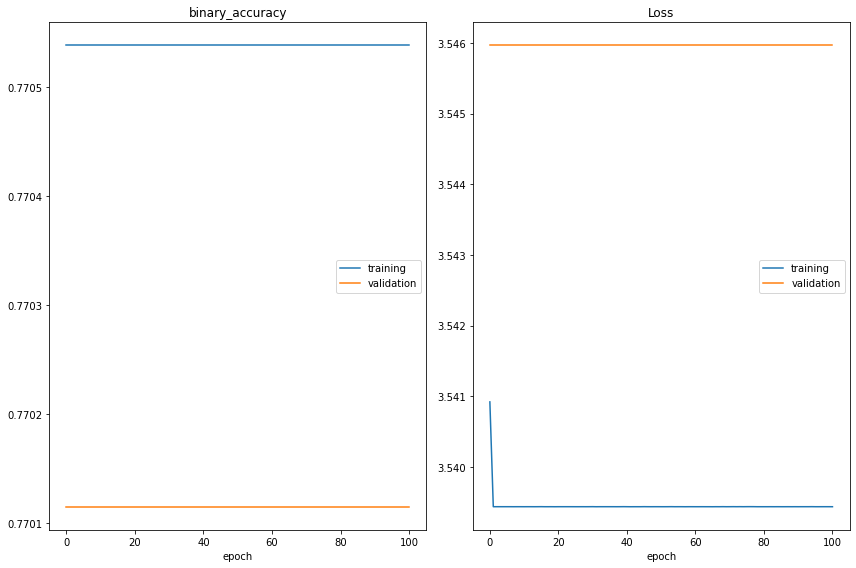

binary_accuracy
	training         	 (min:    0.771, max:    0.771, cur:    0.771)
	validation       	 (min:    0.770, max:    0.770, cur:    0.770)
Loss
	training         	 (min:    3.539, max:    3.541, cur:    3.539)
	validation       	 (min:    3.546, max:    3.546, cur:    3.546)
Epoch 00101: early stopping
Accuracy [3.5459651947021484, 0.7701149582862854]


In [97]:
model = Sequential()
model.add(tf.keras.Input(shape=(X_train.shape[1],)))
model.add(Dense(128))
model.add(Dense(128))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

model.fit(
    X_train, y_train,
    epochs=10000,
    validation_data=(X_test, y_test),
    callbacks=[PlotLossesKeras(), es, mc],
    verbose=0,
    batch_size=32
)

# model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy {scores}")

In [85]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42, probability=True)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

array([0.76760563, 0.77304965, 0.77304965, 0.77304965, 0.76595745])

In [86]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.77 accuracy with a standard deviation of 0.00


In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.491


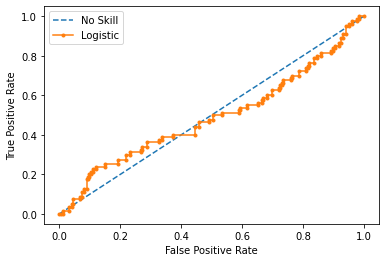

In [90]:
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# print(lr_probs)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.503


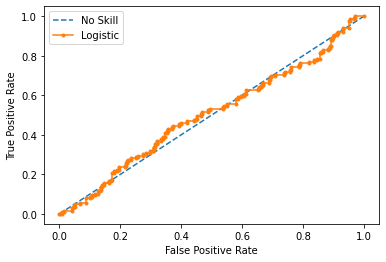

In [78]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X_new, y_new, test_size=0.5, random_state=2)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()